Building a predictive model on the Apprentice Chef, Inc. dataset with REVENUE as the response variable will involve several steps, including feature engineering, model preparation, variable selection, and model development. However, with a systematic approach and careful consideration of the data, creating a model that accurately predicts revenue for new customers. The goal is to develop an algorithm that can anticipate the platform's capacity to sell to a larger audience with the best accuracy possible. We need to download the following programs in order to finish the analysis of the Apprentice Chef data.

# Loading File and Libraries

In [106]:
# Importing necessary libraries
import pandas as pd                    # data science essentials
import numpy as np                     # mathematical essentials
import matplotlib.pyplot as plt        # essential graphical output
import seaborn as sns                  # enhanced graphical output
import statsmodels.formula.api as smf  # regression modeling
import sklearn.linear_model            # linear modeling in scikit-learn
from sklearn.model_selection import train_test_split # train/test split

# importing machine learning models
from sklearn.tree     import plot_tree
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import GradientBoostingRegressor # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
chef = pd.read_excel(io = file)

#obtaining the top 10 rows as output to enhance data understanding
chef.head(n=10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


In [107]:
#Finding the dataset's missing or null values
chef.isna().sum()

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [108]:
# looping to find features with missing values
for col in chef:

    # creating columns with 1s if missing and 0 if not
    if chef[col].isnull().astype(int).sum() > 0:
        chef['m_'+col] = chef[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
chef[    ['m_FAMILY_NAME']    ].sum(axis = 0)

m_FAMILY_NAME    46
dtype: int64

In [109]:
#Filling the missing values for FAMILY_NAME
# creating a value for imputation
fill = 'UNKNOWN'


# filling 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

In [110]:
#determining whether the FAMILY NAME column still has any missing data
chef['FAMILY_NAME'].isna().sum()

0

In [111]:
#Details on each variable
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1946 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

Checking the value counts for all variables that look to contain a lot of zeros using subsetting. This information provides a high-level understanding of the structure and content of the DataFrame, which can help guide further analysis and data processing.

In [112]:
# counting the number of zeroes

rev_zeroes         = len(chef['REVENUE'][chef["REVENUE"] == 0]) # REVENUE
tmo_zeroes         = len(chef['TOTAL_MEALS_ORDERED'][chef["TOTAL_MEALS_ORDERED"] == 0]) # TOTAL_MEALS_ORDERED 
purch_zeroes       = len(chef['UNIQUE_MEALS_PURCH'][chef["UNIQUE_MEALS_PURCH"] == 0]) # UNIQUE_MEALS_PURCH 
cs_zeroes          = len(chef['CONTACTS_W_CUSTOMER_SERVICE'][chef["CONTACTS_W_CUSTOMER_SERVICE"] == 0]) # CONTACTS_W_CUSTOMER_SERVICE 
pd_cat_zeroes      = len(chef['PRODUCT_CATEGORIES_VIEWED'][chef["PRODUCT_CATEGORIES_VIEWED"] == 0]) # PRODUCT_CATEGORIES_VIEWED
site_zeroes        = len(chef['AVG_TIME_PER_SITE_VISIT'][chef["AVG_TIME_PER_SITE_VISIT"] == 0]) # AVG_TIME_PER_SITE_VISIT
cancel_zeroes      = len(chef['CANCELLATIONS_AFTER_NOON'][chef["CANCELLATIONS_AFTER_NOON"] == 0]) # CANCELLATIONS_AFTER_NOON
pc_zeroes          = len(chef['PC_LOGINS'][chef["PC_LOGINS"] == 0]) # PC_LOGINS 
mobile_zeroes      = len(chef['MOBILE_LOGINS'][chef["MOBILE_LOGINS"] == 0]) # MOBILE_LOGINS
plan_zeroes        = len(chef['WEEKLY_PLAN'][chef["WEEKLY_PLAN"] == 0]) # WEEKLY_PLAN
late_dv_zeroes     = len(chef['LATE_DELIVERIES '][chef["LATE_DELIVERIES "] == 0]) # LATE_DELIVERIES
vid_zeroes         = len(chef['AVG_PREP_VID_TIME'][chef["AVG_PREP_VID_TIME"] == 0]) # AVG_PREP_VID_TIME
order_zeroes       = len(chef['LARGEST_ORDER_SIZE'][chef["LARGEST_ORDER_SIZE"] == 0]) # LARGEST_ORDER_SIZE 
rating_zeroes      = len(chef['AVG_MEAN_RATING'][chef["AVG_MEAN_RATING"] == 0]) # AVG_MEAN_RATING
photo_zeroes       = len(chef['TOTAL_PHOTOS_VIEWED'][chef["TOTAL_PHOTOS_VIEWED"] == 0]) # TOTAL_PHOTOS_VIEWED

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Revenue              | {rev_zeroes}\t\t{len(chef) - rev_zeroes}
Meals Ordered        | {tmo_zeroes}\t\t{len(chef) - tmo_zeroes}
Unique Meals         | {purch_zeroes}\t\t{len(chef) - purch_zeroes}
Customer Service     | {cs_zeroes}\t\t{len(chef) - cs_zeroes}
Product Categories   | {pd_cat_zeroes}\t\t{len(chef) - pd_cat_zeroes}
Site Visit           | {site_zeroes}\t\t{len(chef) - site_zeroes}
Cancellations        | {cancel_zeroes}\t\t{len(chef) - cancel_zeroes}
PC Logins            | {pc_zeroes}\t\t{len(chef) - pc_zeroes}
Mobile Logins        | {mobile_zeroes}\t\t{len(chef) - mobile_zeroes}
Weekly Plans         | {plan_zeroes}\t\t{len(chef) - plan_zeroes}
Late Delivery        | {late_dv_zeroes}\t\t{len(chef) - late_dv_zeroes}
Video Time           | {vid_zeroes}\t\t{len(chef) - vid_zeroes}
Largest Order        | {order_zeroes}\t\t{len(chef) - order_zeroes}
Ratings              | {rating_zeroes}\t\t{len(chef) - rating_zeroes}
Photos               | {photo_zeroes}\t\t{len(chef) - photo_zeroes} """)



                 No		Yes
               ---------------------
Revenue              | 0		1946
Meals Ordered        | 0		1946
Unique Meals         | 0		1946
Customer Service     | 0		1946
Product Categories   | 0		1946
Site Visit           | 0		1946
Cancellations        | 572		1374
PC Logins            | 0		1946
Mobile Logins        | 16		1930
Weekly Plans         | 468		1478
Late Delivery        | 1433		513
Video Time           | 0		1946
Largest Order        | 0		1946
Ratings              | 0		1946
Photos               | 0		1946 


Code block above counts the number of zeroes for each variable in the chef dataset, then prints a table that shows the number of zeroes and non-zeroes for each variable.

# Visualizing the Data

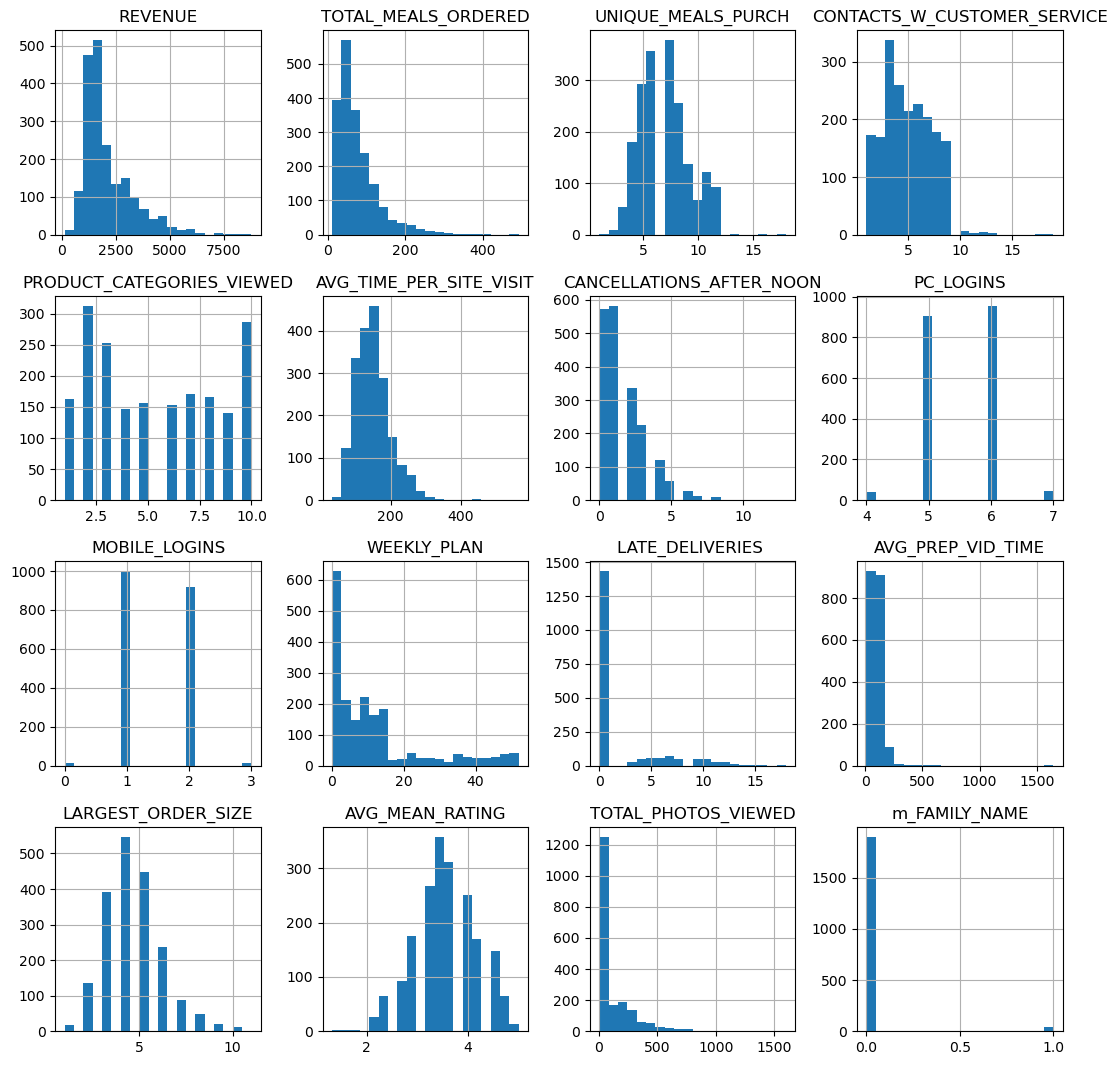

In [113]:
#utilizing a histogram to visualize the numerical data to assist in identification
# plot histograms for each numeric column
# select only numerical columns
num_data = chef.select_dtypes(include=['float64', 'int64']) 
num_data.hist(bins=20, figsize=(13, 13))
plt.show()

Utilizing histograms is a helpful way to get a quick overview of the distribution of numerical data in a dataset and can be a good starting point for data exploration and analysis. This is a practical approach to visualize the distribution of numerical data in a dataset and can assist in identifying patterns or outliers in the data. By using histograms, we can quickly see how the data is distributed, whether it is skewed, bimodal, or normally distributed. The number of bins can be adjusted to get a more granular view of the data. The findings above demonstrate the data set's irregularities. Some variables have a positive skew, while others have a negative skew.

In [114]:
#Descriptive statistics for numerical information
chef.describe()

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,74.634121,6.983556,4.904933,5.383864,150.556578,1.570915,5.515930,1.476362,11.329908,2.053443,99.604651,4.437307,3.554795,113.151593,0.023638
std,1138.290709,55.309782,2.281193,2.502175,3.044001,49.447180,1.611130,0.580757,0.527600,13.573303,3.788933,62.341756,1.549666,0.614178,177.152284,0.151958
min,131.000000,11.000000,1.000000,1.000000,1.000000,33.400000,0.000000,4.000000,0.000000,0.000000,0.000000,10.330000,1.000000,1.315789,1.000000,0.000000
25%,1350.000000,39.000000,5.000000,3.000000,3.000000,114.400000,0.000000,5.000000,1.000000,1.000000,0.000000,72.000000,3.000000,3.157895,10.000000,0.000000
50%,1740.000000,60.000000,7.000000,5.000000,5.000000,145.600000,1.000000,6.000000,1.000000,7.000000,0.000000,94.160000,4.000000,3.421053,17.000000,0.000000
75%,2670.000000,95.000000,8.000000,7.000000,8.000000,173.775000,2.000000,6.000000,2.000000,13.000000,3.000000,117.287500,5.000000,3.947368,174.000000,0.000000
max,8793.750000,493.000000,18.000000,19.000000,10.000000,564.200000,13.000000,7.000000,3.000000,52.000000,18.000000,1645.600000,11.000000,5.000000,1600.000000,1.000000


In [115]:
#evaluating the variables' skewness
chef.skew().round(decimals = 2)

/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_47164/4013379813.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chef.skew().round(decimals = 2)


REVENUE                        1.63
TOTAL_MEALS_ORDERED            2.01
UNIQUE_MEALS_PURCH             0.57
CONTACTS_W_CUSTOMER_SERVICE    0.37
PRODUCT_CATEGORIES_VIEWED      0.16
AVG_TIME_PER_SITE_VISIT        1.20
CANCELLATIONS_AFTER_NOON       1.44
PC_LOGINS                     -0.04
MOBILE_LOGINS                  0.05
WEEKLY_PLAN                    1.54
LATE_DELIVERIES                1.71
AVG_PREP_VID_TIME              9.64
LARGEST_ORDER_SIZE             0.70
AVG_MEAN_RATING               -0.11
TOTAL_PHOTOS_VIEWED            2.60
m_FAMILY_NAME                  6.28
dtype: float64

In [116]:
# defining the list of continuous features
continuous_data = ['REVENUE', 
                   'AVG_TIME_PER_SITE_VISIT',
                   'AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE',
                   'AVG_MEAN_RATING',
                   'TOTAL_PHOTOS_VIEWED',
                   'TOTAL_MEALS_ORDERED',
                  'UNIQUE_MEALS_PURCH',
                  'CONTACTS_W_CUSTOMER_SERVICE',
                  'WEEKLY_PLAN',
                  'LATE_DELIVERIES ']


# building a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# calculating the correlations between each continuous column and REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_PREP_VID_TIME              0.14
UNIQUE_MEALS_PURCH             0.10
WEEKLY_PLAN                    0.01
LATE_DELIVERIES               -0.02
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

The typical meal plan has a moderately negative association with REVENUE. Although if LATE DELIVERIES has a slender negative association, this suggests to me that late deliveries could have an impact on the rating. Investigating these 2 features for more depth. 

In [117]:
#Developing a new feature based on the presumption that rating is affected by late delivery.

# calculate the average late deliveries per order and average mean rating to create a new feature that combines the average late deliveries and average mean rating

chef['LATE_DELV_AND_RATING'] = chef['LATE_DELIVERIES ']/len(chef) + chef['AVG_MEAN_RATING']

# create a new feature that adds up the total number of photos viewed and total meals ordered
chef['PHOTO_VIEWED_MEAL_ORDERED'] = chef['TOTAL_PHOTOS_VIEWED'] + chef['TOTAL_MEALS_ORDERED']

In [118]:
# placeholder variables
chef['has_WEEKLY_PLAN'] = 0

# changing values in the new feature columns by iterating through the old column
for index, value in chef.iterrows():

    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_WEEKLY_PLAN'] = 1

chef['has_WEEKLY_PLAN'].head(n=5)

0    0
1    0
2    1
3    0
4    1
Name: has_WEEKLY_PLAN, dtype: int64

Splitting Emails. It's crucial to divide the emails so that we may use them effectively in various groups. This will help us track down our consumers more effectively and gain more valuable information.

In [119]:
# placeholder list
email_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    email_info = chef.loc[index,'EMAIL'].split(sep = '@')

    
    # appending placeholder_lst with the results
    email_lst.append(email_info)
    
# converting placeholder_lst into a DataFrame 
df_temp = pd.DataFrame(email_lst)

In [120]:
# checking results 
df_temp

,0,1
0,steffon.baratheon,yahoo.com
1,harlon.greyjoy,visa.com
2,monster,protonmail.com
3,damon.lannister.(lord),yahoo.com
4,raynald.westerling,jnj.com
...,...,...
1941,wat.(barleycorn),live.com
1942,hendry.bracken,exxon.com
1943,aenys.i.targaryen,passport.com
1944,leo.blackbar,pg.com


In [121]:
#Setting Personal, Professional and Junk Emails
personal      = ['@gmail.com',
                               '@yahoo.com',
                               '@protonmail.com']

professional                 = ['@mmm.com',
                               '@amex.com',
                               '@apple.com',
                               '@boeing.com',
                               '@caterpillar.com',
                               '@chevron.com',
                               '@cisco.com',
                               '@cocacola.com',
                               '@disney.com',
                               '@dupont.com',
                               '@exxon.com',
                               '@ge.org',
                               '@goldmansacs.com',
                               '@homedepot.com',
                               '@ibm.com',
                               '@intel.com',
                               '@jnj.com',
                               '@jpmorgan.com',
                               '@mcdonalds.com',
                               '@merck.com',
                               '@microsoft.com',
                               '@nike.com',
                               '@pfizer.com',
                               '@pg.com',
                               '@travelers.com',
                               '@unitedtech.com',
                               '@unitedhealth.com',
                               '@verizon.com',
                               '@visa.com',
                               '@walmart.com']

junk                        = ['@me.com',
                            '@aol.com',
                            '@hotmail.com',
                            '@live.com',
                            '@msn.com',
                            '@passport.com']

In [122]:
# placeholder list
email_lst2 = []


# looping to group observations by domain type
for domain in df_temp[1]:
        if '@' + domain in personal:
            email_lst2.append('personal')
            
        elif '@' + domain in professional:
            email_lst2.append('professional')
           
        elif '@' + domain in junk:
            email_lst2.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['DOMAIN'] = pd.Series(email_lst2)

# checking results
chef['DOMAIN'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN, dtype: int64

In [123]:
# checking results
chef.head()

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,LATE_DELV_AND_RATING,PHOTO_VIEWED_MEAL_ORDERED,has_WEEKLY_PLAN,DOMAIN
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,2.894737,949,0,personal
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,2.631579,1041,0,professional
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,3.684211,423,1,personal
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,3.157895,687,0,personal
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,3.157895,450,1,professional


In [124]:
#Creating dummies for Emails
Dummy      = pd.get_dummies(chef['DOMAIN'])

In [125]:
chef        = chef.drop('EMAIL', axis = 1)
chef        = chef.drop('DOMAIN', axis = 1)

In [126]:
#joining column
chef        = chef.join([Dummy])

In [127]:
# checking results
chef

,REVENUE,NAME,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,LATE_DELV_AND_RATING,PHOTO_VIEWED_MEAL_ORDERED,has_WEEKLY_PLAN,junk,personal,professional
0,4920.000,Steffon Baratheon,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,2.894737,949,0,0,1,0
1,6150.000,Harlon Greyjoy,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,2.631579,1041,0,0,0,1
2,3435.000,Monster,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,3.684211,423,1,0,1,0
3,3330.000,Damon Lannister (lord),Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,3.157895,687,0,0,1,0
4,3427.500,Raynald Westerling,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,3.157895,450,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,2940.000,Wat (Barleycorn),Wat,UNKNOWN,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16,1,2.894737,105,1,1,0,0
1942,7087.500,Hendry Bracken,Hendry,Bracken,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302,0,2.635690,457,0,0,0,1
1943,6562.500,Aenys I Targaryen,Aenys,I Targaryen,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310,0,2.636204,375,0,1,0,0
1944,5355.000,Leo Blackbar,Leo,Blackbar,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275,0,2.631579,333,0,0,0,1


# EDA

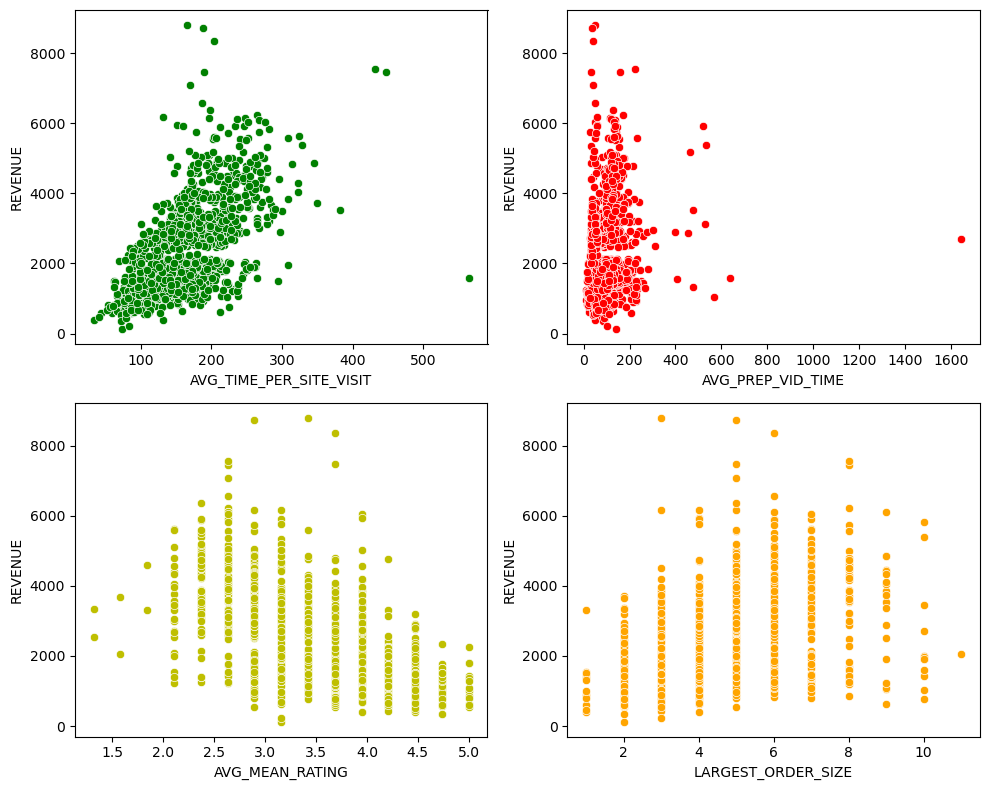

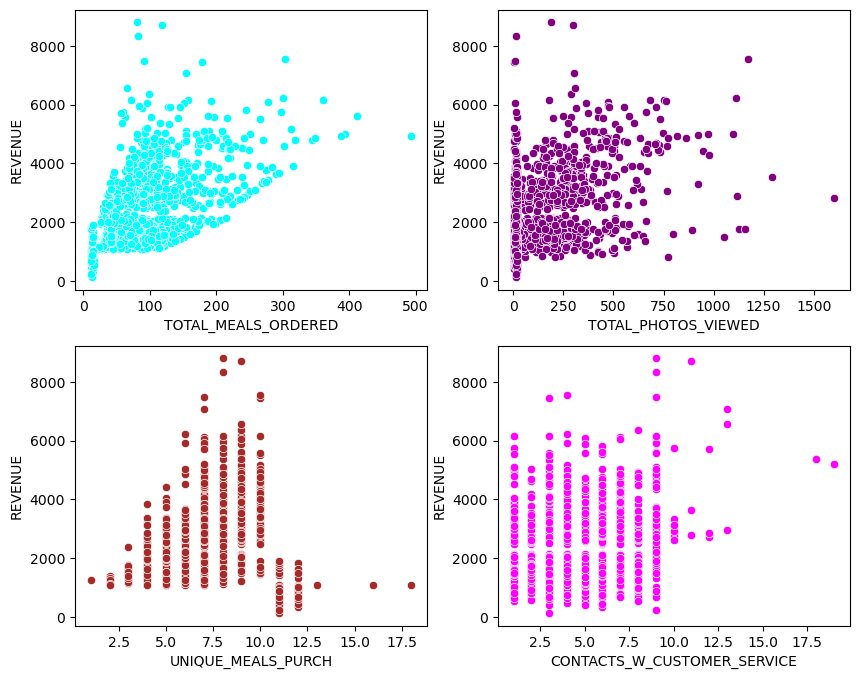

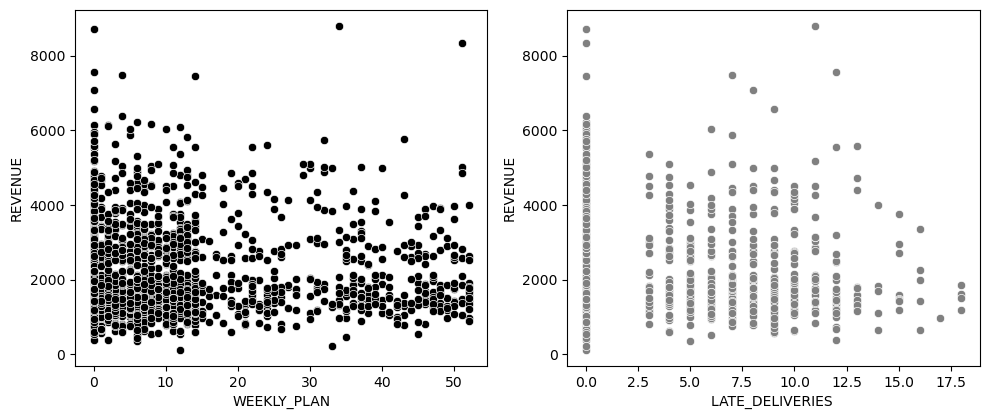

In [128]:
#Developing Trend-Based Features
#Developing a few scatter plots between continuous X-variables with REVENUE as a y-variable..

########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_MEAN_RATING'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'cyan')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

#######################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'purple')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'brown')


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')

########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'magenta')


# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'black')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')

#######################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES '],
                y = chef['REVENUE'],
                color = 'gray')


# adding labels but not adding title
plt.xlabel(xlabel = 'LATE_DELIVERIES ')
plt.ylabel(ylabel = 'REVENUE')

#######################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

I want to view the scatter plots right away so that I can examine the data again to evaluate my work and, if necessary, set any more thresholds when the scatters start to fray out in strange ways.

In [129]:
# log transforming skewed explanatory features and saving it to the dataset

#Revenue
chef['log_REVENUE'] = np.log(chef['REVENUE'])
#Meals Ordered
chef['log_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'])
#Site Visit
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])
#Weekly Plans
chef['log_WEEKLY_PLAN'] = np.log(chef['WEEKLY_PLAN'] + 0.001)
#Late Delivery
chef['log_LATE_DELIVERIES'] = np.log(chef['LATE_DELIVERIES '] + 0.001)
#Video Time
chef['log_AVG_PREP_VID_TIME'] = np.log(chef['AVG_PREP_VID_TIME'])
#Largest Order
chef['log_LARGEST_ORDER_SIZE'] = np.log(chef['LARGEST_ORDER_SIZE'])
#Ratings
chef['log_AVG_MEAN_RATING'] = np.log(chef['AVG_MEAN_RATING'])
#Photos
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'])

#LATE_DELV_AND_RATING
chef['log_AVG_LATE_DELV_AND_RATING'] = np.log(chef['LATE_DELV_AND_RATING'])

#PHOTO_VIEWED_MEAL_ORDERED
chef['log_PHOTO_VIEWED_MEAL_ORDERED'] = np.log(chef['PHOTO_VIEWED_MEAL_ORDERED'])

The log transformations will help to reduce the impact of the outliers and improve the linearity of the relationships between the explanatory features and the response variable.

In [130]:
# creating a list of continuous features and check the correlations of these new features with revenue.
continuous_data = ['log_REVENUE',
                   'log_AVG_TIME_PER_SITE_VISIT',
                   'log_AVG_PREP_VID_TIME',
                   'log_LARGEST_ORDER_SIZE',
                   'log_AVG_MEAN_RATING',
                   'log_TOTAL_PHOTOS_VIEWED',
                   'log_TOTAL_MEALS_ORDERED',
                  'UNIQUE_MEALS_PURCH',
                  'CONTACTS_W_CUSTOMER_SERVICE',
                  'log_WEEKLY_PLAN',
                  'log_LATE_DELIVERIES',
                  'log_AVG_LATE_DELV_AND_RATING']

# creating a (Pearson) correlation matrix
chef_corr = chef[continuous_data].corr(method = 'pearson')
# printing (Pearson) correlations with Revenue
chef_corr.loc[ : , 'log_REVENUE'].round(decimals = 2).sort_values(ascending = False)

log_REVENUE                     1.00
log_TOTAL_MEALS_ORDERED         0.69
log_AVG_TIME_PER_SITE_VISIT     0.67
log_LARGEST_ORDER_SIZE          0.45
log_TOTAL_PHOTOS_VIEWED         0.42
CONTACTS_W_CUSTOMER_SERVICE     0.18
log_AVG_PREP_VID_TIME           0.15
log_WEEKLY_PLAN                -0.02
log_LATE_DELIVERIES            -0.03
UNIQUE_MEALS_PURCH             -0.04
log_AVG_MEAN_RATING            -0.58
log_AVG_LATE_DELV_AND_RATING   -0.58
Name: log_REVENUE, dtype: float64

# Working with with Interval and Count Data

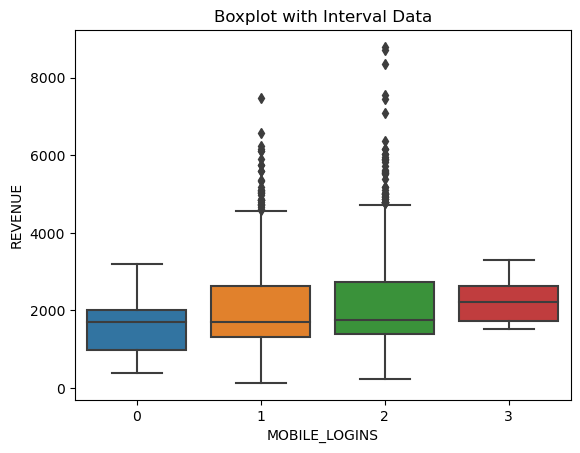

In [131]:
#Boxplots are used to show relationships between interval and count data.

# boxplot - MOBILE_LOGINS and REVENUE
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

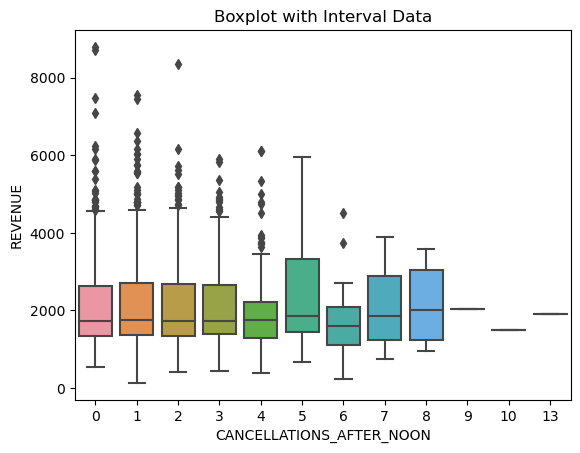

In [132]:
#Boxplots are used to show relationships between interval and count data.

# boxplot - CANCELLATIONS_AFTER_NOON and REVENUE
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

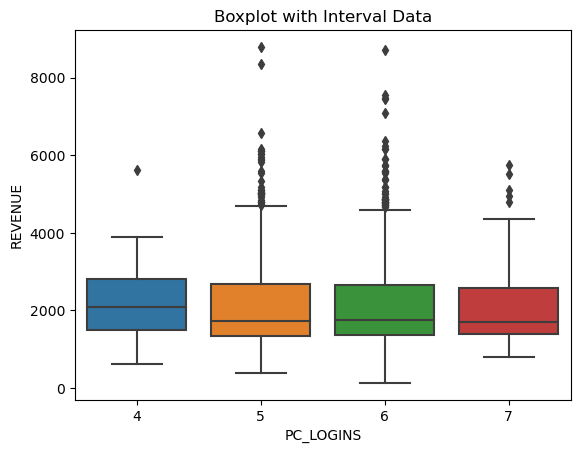

In [133]:
#Boxplots are used to show relationships between interval and count data.

# boxplot - PC_LOGINS and REVENUE
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

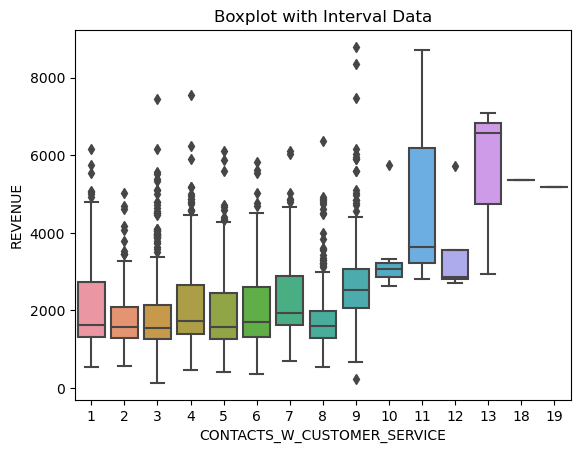

In [134]:
#Boxplots are used to show relationships between interval and count data.

# boxplot - CONTACTS_W_CUSTOMER_SERVICE and REVENUE
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

Based on the box plot above, I am making the premise that individuals who skipped lunch after midday were most likely stranded at work. Those who are unable to leave their workplace frequently use PCs to access websites. Determining if the box plot is improved by combining PC LOGINS and CANCELLATIONS AFTER NOON is the result.

In [135]:
#Developing a new feature based on the presumption
chef = chef.assign(PC_LOGINS_AND_CANCELLATIONS = chef['PC_LOGINS'] + chef['CANCELLATIONS_AFTER_NOON'])

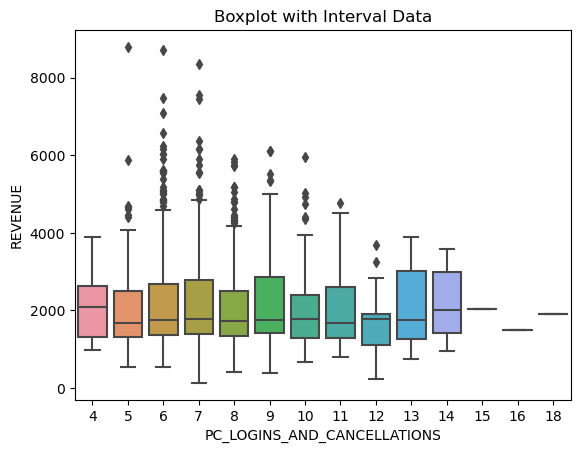

In [136]:
#checking results
#Boxplots are used to show relationships between interval and count data.

# boxplot - PC_LOGINS_AND_CANCELLATIONS & REVENUE
sns.boxplot(x    = 'PC_LOGINS_AND_CANCELLATIONS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS_AND_CANCELLATIONS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

In [137]:
#removing zeros from mobile logins to test whether the box plot is improved
# placeholder variables
chef['has_MOBILE_LOGINS']     = 0

# iterating over original column to update values in the new feature columns
for index, value in chef.iterrows():

    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'has_MOBILE_LOGINS'] = 1
        
chef['has_MOBILE_LOGINS'].head(n=5)

0    1
1    1
2    1
3    1
4    1
Name: has_MOBILE_LOGINS, dtype: int64

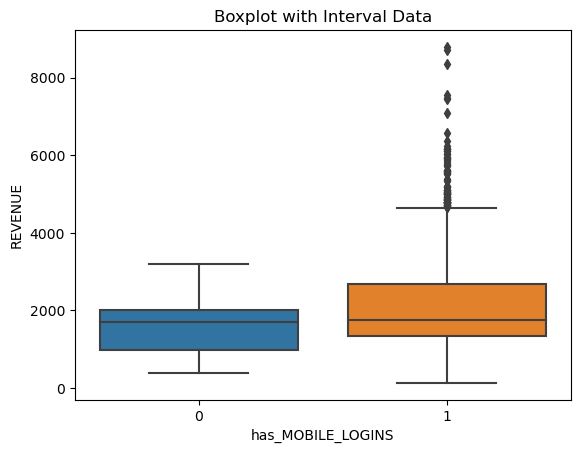

In [138]:
#checking results
#Boxplots are used to show relationships between interval and count data.


# boxplot - has_MOBILE_LOGINS and REVENUE
sns.boxplot(x    = 'has_MOBILE_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'has_MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

Encoding Categorical Data, to see the value counts for each variable that was assumed categorical.

In [139]:
# printing columns

print(f"""
NAME
------
{chef['NAME'].value_counts()}


FIRST NAME
----------
{chef['FIRST_NAME'].value_counts()}


FAMILY_NAME
-------------
{chef['FAMILY_NAME'].value_counts()}
""")


NAME
------
Steffon Baratheon             1
Ormond (knight)               1
Brandon Stark (Shipwright)    1
Beron Blacktyde               1
Ben Bushy                     1
                             ..
Tristifer Botley              1
Garlan Tyrell                 1
Barth (brewer)                1
Draqaz                        1
Anguy                         1
Name: NAME, Length: 1946, dtype: int64


FIRST NAME
----------
Jon        21
Jeyne      14
Aegon      12
Alyn       10
Walder     10
           ..
Igon        1
Iggo        1
Gysella     1
Eleyna      1
Anguy       1
Name: FIRST_NAME, Length: 1442, dtype: int64


FAMILY_NAME
-------------
Frey         79
UNKNOWN      46
Stark        32
Lannister    29
Tyrell       28
             ..
Tumberjon     1
Matt          1
Mullin        1
Myre          1
Anguy         1
Name: FAMILY_NAME, Length: 1071, dtype: int64



# Modeling: Linear Regression

In [140]:
# x-variables for normal y
x_variables = ['AVG_TIME_PER_SITE_VISIT',
         'TOTAL_MEALS_ORDERED', 
         'TOTAL_PHOTOS_VIEWED', 
         'PHOTO_VIEWED_MEAL_ORDERED',
         'PRODUCT_CATEGORIES_VIEWED', 
         'TOTAL_PHOTOS_VIEWED',
         'MOBILE_LOGINS']

# x-variables for log y
x_variables_log_y = ['log_AVG_TIME_PER_SITE_VISIT','AVG_MEAN_RATING','log_AVG_LATE_DELV_AND_RATING','LARGEST_ORDER_SIZE',
         'log_LARGEST_ORDER_SIZE','log_TOTAL_MEALS_ORDERED','log_TOTAL_PHOTOS_VIEWED',
        'UNIQUE_MEALS_PURCH','PRODUCT_CATEGORIES_VIEWED','CONTACTS_W_CUSTOMER_SERVICE','PHOTO_VIEWED_MEAL_ORDERED',]

These Basic models are created as a guide so that I could grasp the advantages of using more sophisticated methods and adding more X-variables. Once more X-variables are added, the R-squared increases.

In [141]:
#constructing a linear model with the best possible efficiency utilizing continuous x-variables.

# building a full model
lm_full = smf.ols(formula =  """ log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT +
                                               AVG_MEAN_RATING+
                                               log_AVG_LATE_DELV_AND_RATING +
                                               log_LARGEST_ORDER_SIZE + 
                                               log_TOTAL_MEALS_ORDERED + 
                                               log_TOTAL_PHOTOS_VIEWED + 
                                               CONTACTS_W_CUSTOMER_SERVICE +
                                               UNIQUE_MEALS_PURCH + 
                                               PHOTO_VIEWED_MEAL_ORDERED+
                                               PRODUCT_CATEGORIES_VIEWED
                                             
                                             
                                          
                                            
                                         
                                                 """,
                                data = chef)


# instructing Python to process the data through the design
results_full_1 = lm_full.fit()


# printing the results
results_full_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     431.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:31:14   Log-Likelihood:                -222.09
No. Observations:                1946   AIC:                             466.2
Df Residuals:                    1935   BIC:                             527.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.5013      0.181     19.344      0.000       3.146       3.856
log_AVG_TIME_PER_SITE_VISIT      0.6617      0.037     17.755      0.000       0.589       0.735
AVG_MEAN_RATING                 -0.0096      0.076     -0.125      0.900      -0.159       0.140
log_AVG_LATE_DELV_AND_RATING    -0.4123      0.258     -1.601      0.110      -0.918       0.093
log_LARGEST_ORDER_SIZE          -0.1819      0.028     -6.463      0.000      -0.237      -0.127
log_TOTAL_MEALS_ORDERED          0.2839      0.013     22.345      0.000       0.259       0.309
log_TOTAL_PHOTOS_VIEWED          0.0290      0.007      4.271      0.000       0.016       0.042
CONTACTS_W_CUSTOMER_SERVICE      0.0324      0.002     13.006      0.000       0.027       0.037
UNIQUE_MEALS_PURCH               0.0163      0.003      5.302      0.000       0.010       0.022
PHOTO_VIEWED_MEAL_ORDERED     1.556e-05   6.11e-05      0.255      0.799      -0.000       0.000
PRODUCT_CATEGORIES_VIEWED        0.0041      0.002      2.025      0.043       0.000       0.008
==============================================================================
Omnibus:                      138.065   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.453
Skew:                          -0.250   Prob(JB):                    2.16e-114
Kurtosis:                       5.491   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Train Test Split

I am now prepared to divide my data into the appropriate segments, start running various model types, and start obtaining results.

In [142]:
# preparing explanatory variable data
x = chef.drop(['REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME'], axis=1)

In [143]:
# preparing response variable data
y = chef[['REVENUE']]
y_log= np.log(chef[['REVENUE']])

In [144]:
###### preparing for scikit-learn

# Preparing a DataFrame based the the analysis above
x_data = chef.loc[ : , x_variables]
x_data = chef.loc[ : , x_variables_log_y]


# preparing response variable
y_data      = chef.loc[ : , 'REVENUE']
log_y_data  = chef.loc[ : , 'log_REVENUE']


#################################
## setting up train-test split ##
#################################

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_log, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [145]:
# specifying a model name
model_name = 'Random Forest'



model = RandomForestRegressor(
                                  min_samples_split=5,
                                  max_depth        = 4,
                                  min_samples_leaf = 25,
                                  random_state     = 219)



model_fit = model.fit(x_train, y_train)



model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# Initiating dynamic Printing of results
print(f"""  
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}\n\n """)

  
Train_Score:    0.7629
Test_Score:     0.7443
Train-Test Gap: 0.0186

 


/var/folders/qd/k600f85s3mlcxldc5c0t12g80000gn/T/ipykernel_47164/1378829419.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_fit = model.fit(x_train, y_train)


In [146]:
# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6889
Testing Score  : 0.6956
Train-Test Gap : 0.0067


# Extracting Coefficients

In [147]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', array([3.37]))
('log_AVG_TIME_PER_SITE_VISIT', array([ 0.69,  0.08, -0.7 , -0.05,  0.01,  0.28,  0.03,  0.02,  0.  ,
        0.03,  0.  ]))


In [148]:
# dynamically printing results
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

Model Name:     Linear Regression
Train_Score:    0.6889
Test_Score:     0.6956
Train-Test Gap: 0.0067

Coefficents
-----------
                       Feature                                        Coefficient
0                    intercept                                             [3.37]
1  log_AVG_TIME_PER_SITE_VISIT  [0.69, 0.08, -0.7, -0.05, 0.01, 0.28, 0.03, 0....


In [149]:
# Setting a model name
model_name = "Lasso Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.2895
Testing Score  : 0.272
Train-Test Gap : 0.0175


In [150]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', array([7.28]))
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('AVG_MEAN_RATING', -0.0)
('log_AVG_LATE_DELV_AND_RATING', -0.0)
('LARGEST_ORDER_SIZE', 0.0)
('log_LARGEST_ORDER_SIZE', 0.0)
('log_TOTAL_MEALS_ORDERED', 0.0)
('log_TOTAL_PHOTOS_VIEWED', -0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PHOTO_VIEWED_MEAL_ORDERED', 0.0)


In [151]:
# dynamically printing results
lasso_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(lasso_model)

Model Name:     Lasso Regression
Train_Score:    0.2895
Test_Score:     0.272
Train-Test Gap: 0.0175

Coefficents
-----------
                         Feature Coefficient
0                      intercept      [7.28]
1    log_AVG_TIME_PER_SITE_VISIT         0.0
2                AVG_MEAN_RATING        -0.0
3   log_AVG_LATE_DELV_AND_RATING        -0.0
4             LARGEST_ORDER_SIZE         0.0
5         log_LARGEST_ORDER_SIZE         0.0
6        log_TOTAL_MEALS_ORDERED         0.0
7        log_TOTAL_PHOTOS_VIEWED        -0.0
8             UNIQUE_MEALS_PURCH        -0.0
9      PRODUCT_CATEGORIES_VIEWED         0.0
10   CONTACTS_W_CUSTOMER_SERVICE         0.0
11     PHOTO_VIEWED_MEAL_ORDERED         0.0


In [152]:
# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6883
Testing Score  : 0.6951
Train-Test Gap : 0.0068


/Users/tanginaparvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
# dynamically printing results
ard_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ard_model)

Model Name:     ARD Regression
Train_Score:    0.6883
Test_Score:     0.6951
Train-Test Gap: 0.0068

Coefficents
-----------
                         Feature Coefficient
0                      intercept      [7.28]
1    log_AVG_TIME_PER_SITE_VISIT         0.0
2                AVG_MEAN_RATING        -0.0
3   log_AVG_LATE_DELV_AND_RATING        -0.0
4             LARGEST_ORDER_SIZE         0.0
5         log_LARGEST_ORDER_SIZE         0.0
6        log_TOTAL_MEALS_ORDERED         0.0
7        log_TOTAL_PHOTOS_VIEWED        -0.0
8             UNIQUE_MEALS_PURCH        -0.0
9      PRODUCT_CATEGORIES_VIEWED         0.0
10   CONTACTS_W_CUSTOMER_SERVICE         0.0
11     PHOTO_VIEWED_MEAL_ORDERED         0.0


After running several different test find out the random forest model achieved a training R-squared of 0.7629 and a testing R-squared of 0.7443, with a train-test gap of 0.0186. This suggests that the model is performing reasonably well in predicting the response variable (log_REVENUE). 